In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Setup package path for development
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()

# Add the parent directory to Python path
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import PyHydroGeophysX modules
from PyHydroGeophysX.inversion.time_lapse import TimeLapseERTInversion
from PyHydroGeophysX.inversion.windowed import WindowedTimeLapseERTInversion

In [2]:



data_dir = "results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]


# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(os.path.join(data_dir, ert_files[0]))
ert_manager = ert.ERTManager(data)
mesh_with_interface = pg.load("results/Structure_WC/mesh_with_interface.bms")


In [3]:

# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Define the window size (number of timesteps to process together)
window_size = 3  # A window size of 3 means each window includes 3 consecutive measurements

# Create the windowed time-lapse inversion object
inversion = WindowedTimeLapseERTInversion(
    data_dir=data_dir,               # Directory containing ERT data files
    ert_files=ert_files,             # List of ERT data filenames
    measurement_times=measurement_times,  # List of measurement times
    window_size=window_size,         # Size of sliding window
    mesh=mesh_with_interface,                       # Mesh for inversion
    **inversion_params               # Pass the same inversion parameters
)

# Run the inversion, optionally in parallel
print("Starting windowed time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")


Starting windowed time-lapse inversion...

Processing 10 windows sequentially...
Using L2 inversion

Starting L2 inversion for window 0


02/06/25 - 12:58:52 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 12:58:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 12:58:52 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 12:58:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 12:58:52 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 12:58:52 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 12:58:53 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 12:58:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 12:58:53 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 12:59:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 12:59:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 12:59:21 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380
02/06/25 - 12:59:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 12:59:47 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 12:59:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


ERT chi2: 2615.2296353773427
dPhi: 1.0
ERTphi_d: 6496230.414277319, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 40.23401004836831
dPhi: 0.9846154962821981
ERTphi_d: 99941.28096014689, ERTphi_m: 3838.2453243514606, ERTphi_t: 1715.7108720555755
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 19.32759900126716
dPhi: 0.5196203665000827
ERTphi_d: 48009.755919147625, ERTphi_m: 1537.030008048749, ERTphi_t: 1553.397992857087
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 9.010253423136279
dPhi: 0.5338141368441292
ERTphi_d: 22381.469503070515, ERTphi_m: 812.303231651208, ERTphi_t: 1544.7399112329026
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.4980165970610908
dPhi: 0.8337431227833697
ERTphi_d: 3721.0732270997496, ERTphi_m: 720.516318310045, ERTphi_t: 1528.9591573112727
Convergence reached at iteration 4
End of inversion

Window 0 results:
Model shape: (

02/06/25 - 13:16:27 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 13:16:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 13:16:27 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 13:16:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 13:16:27 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 13:16:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 13:16:27 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 13:16:27 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 13:16:27 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 13:16:53 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 13:16:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 13:16:53 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380
02/06/25 - 13:17:18 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 13:17:18 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 13:17:18 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


ERT chi2: 2425.1241777331124
dPhi: 1.0
ERTphi_d: 6024008.457489051, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 35.630868442206626
dPhi: 0.9853076107321183
ERTphi_d: 88507.07721044126, ERTphi_m: 3449.2566350452744, ERTphi_t: 197.28560630995275
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 19.73109592301527
dPhi: 0.44623589641046313
ERTphi_d: 49012.04227276993, ERTphi_m: 1222.7289934334638, ERTphi_t: 173.05912521473374
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 8.385436673802634
dPhi: 0.5750141448543936
ERTphi_d: 20829.424697725743, ERTphi_m: 575.9120762054284, ERTphi_t: 151.4595570895392
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3582564541252757
dPhi: 0.838021977034461
ERTphi_d: 3373.909032047185, ERTphi_m: 478.52614679553494, ERTphi_t: 150.940486950999
Convergence reached at iteration 4
End of inversion

Window 1 results:
Model shape: 

02/06/25 - 13:33:24 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 13:33:24 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 13:33:24 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 13:33:24 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 13:33:24 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 13:33:24 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 13:33:24 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 13:33:24 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 13:33:24 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 13:33:51 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 13:33:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 13:33:52 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380
02/06/25 - 13:34:16 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 13:34:16 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 13:34:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


ERT chi2: 2361.613397698275
dPhi: 1.0
ERTphi_d: 5866247.679882515, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 34.39971794894606
dPhi: 0.9854338064043533
ERTphi_d: 85448.89938518201, ERTphi_m: 3361.7662255509276, ERTphi_t: 280.52731086326844
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 20.164090470675802
dPhi: 0.4138297732381963
ERTphi_d: 50087.600729158694, ERTphi_m: 1185.4195665194986, ERTphi_t: 259.9171140844152
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 8.61858253324193
dPhi: 0.5725776699040431
ERTphi_d: 21408.559012572958, ERTphi_m: 593.8912979527778, ERTphi_t: 239.41694121470334
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.4910854290500817
dPhi: 0.8269918025036072
ERTphi_d: 3703.856205760403, ERTphi_m: 489.3052804896413, ERTphi_t: 234.9764831962267
Convergence reached at iteration 4
End of inversion

Window 2 results:
Model shape: (

02/06/25 - 13:50:27 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 13:50:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 13:50:27 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 13:50:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 13:50:27 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 13:50:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 13:50:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 13:50:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 13:50:28 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 13:50:55 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 13:50:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 13:50:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380
02/06/25 - 13:51:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 13:51:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 13:51:21 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


ERT chi2: 2335.721390868157
dPhi: 1.0
ERTphi_d: 5801931.934916502, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 34.57844670117687
dPhi: 0.9851958170883025
ERTphi_d: 85892.86160572336, ERTphi_m: 3280.042522634275, ERTphi_t: 251.37143142461127
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 20.850902975996934
dPhi: 0.39699711915378555
ERTphi_d: 51793.642992376386, ERTphi_m: 1137.6451299541113, ERTphi_t: 235.42530860291947
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 9.261867343640429
dPhi: 0.5558049762016316
ERTphi_d: 23006.478481602826, ERTphi_m: 577.034682775441, ERTphi_t: 217.90310784736164
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.5550399014918241
dPhi: 0.8321029827144332
ERTphi_d: 3862.719115305691, ERTphi_m: 455.6161956646744, ERTphi_t: 214.40311654769573
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.0475116

02/06/25 - 14:12:10 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 14:12:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 14:12:10 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 14:12:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 14:12:10 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 14:12:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 14:12:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 14:12:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 14:12:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 14:12:40 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 14:12:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 14:12:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380
02/06/25 - 14:13:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 14:13:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 14:13:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


ERT chi2: 2119.8561008208135
dPhi: 1.0
ERTphi_d: 5265722.5544389, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 32.790701164556154
dPhi: 0.9845316381843751
ERTphi_d: 81452.10169275748, ERTphi_m: 3250.9868313114225, ERTphi_t: 1926.5599203791635
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 20.770600302940675
dPhi: 0.366570412791543
ERTphi_d: 51594.17115250464, ERTphi_m: 1235.4918574065473, ERTphi_t: 1786.5424529305028
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 8.893336866880947
dPhi: 0.5718305327159061
ERTphi_d: 22091.048777332275, ERTphi_m: 746.5270210360403, ERTphi_t: 1726.137895204431
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.8031019600182445
dPhi: 0.7972524838530463
ERTphi_d: 4478.905268685319, ERTphi_m: 622.1733939915667, ERTphi_t: 1692.588058238357
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.1798876821

02/06/25 - 14:34:50 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 14:34:50 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 14:34:50 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 14:34:50 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 14:34:50 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 14:34:50 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 14:34:50 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 14:34:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 14:34:51 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 14:35:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 14:35:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 14:35:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380
02/06/25 - 14:35:45 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 14:35:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 14:35:45 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


ERT chi2: 1950.9983948584752
dPhi: 1.0
ERTphi_d: 4846280.0128284525, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 32.15483078721089
dPhi: 0.9835187815264486
ERTphi_d: 79872.59967543185, ERTphi_m: 3119.4912327513252, ERTphi_t: 1914.8790922281487
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 19.66160783525126
dPhi: 0.3885333135364726
ERTphi_d: 48839.43386276413, ERTphi_m: 1192.1063559540798, ERTphi_t: 1795.3522012434817
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 7.613164360420055
dPhi: 0.6127903463332014
ERTphi_d: 18911.100271283416, ERTphi_m: 708.2528422001935, ERTphi_t: 1760.0285534742807
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.646652369284903
dPhi: 0.7837098621112588
ERTphi_d: 4090.2844853036995, ERTphi_m: 587.9347187732619, ERTphi_t: 1727.4395329852848
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.153328

02/06/25 - 14:56:09 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 14:56:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 14:56:09 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 14:56:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 14:56:09 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 14:56:09 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 14:56:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 14:56:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 14:56:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 14:56:40 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 14:56:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 14:56:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380
02/06/25 - 14:57:09 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 14:57:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 14:57:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


ERT chi2: 1883.926390633329
dPhi: 1.0
ERTphi_d: 4679673.154333189, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 35.32987869522822
dPhi: 0.9812466777519099
ERTphi_d: 87759.4186789469, ERTphi_m: 2999.4511580983353, ERTphi_t: 1296.2502699715333
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 19.05519852199428
dPhi: 0.46064919479703886
ERTphi_d: 47333.11312863379, ERTphi_m: 1149.3433426079591, ERTphi_t: 1175.4294265905696
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 7.547676082416648
dPhi: 0.6039046208988684
ERTphi_d: 18748.427388722954, ERTphi_m: 665.2756408425923, ERTphi_t: 1141.3830655410584
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.543681804099047
dPhi: 0.7954758806230083
ERTphi_d: 3834.5056013820326, ERTphi_m: 542.2987378298544, ERTphi_t: 1118.3417904824478
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.12877302

02/06/25 - 15:19:05 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 15:19:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 15:19:05 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 15:19:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 15:19:05 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 15:19:05 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 15:19:05 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 15:19:06 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 15:19:06 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 15:19:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 15:19:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 15:19:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380
02/06/25 - 15:20:07 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 15:20:07 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 15:20:07 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


ERT chi2: 2081.293906039192
dPhi: 1.0
ERTphi_d: 5169934.062601352, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 40.94449047622724
dPhi: 0.9803273865563049
ERTphi_d: 101706.11434294845, ERTphi_m: 3140.547321269243, ERTphi_t: 1343.2014075406823
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 18.282716678250004
dPhi: 0.5534755356434311
ERTphi_d: 45414.26822877301, ERTphi_m: 1221.374768381386, ERTphi_t: 1203.326412039013
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 7.8935912247706606
dPhi: 0.5682484521481835
ERTphi_d: 19607.68060233032, ERTphi_m: 679.1898141013396, ERTphi_t: 1141.7396296763036
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.4915879795798064
dPhi: 0.8110381020366122
ERTphi_d: 3705.104541276239, ERTphi_m: 576.8154164404771, ERTphi_t: 1125.2460253266872
Convergence reached at iteration 4
End of inversion

Window 7 results:
Model shape: (

02/06/25 - 15:37:45 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 15:37:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 15:37:45 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 15:37:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 15:37:45 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 15:37:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 15:37:46 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 15:37:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 15:37:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 15:38:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 15:38:18 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 15:38:18 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380
02/06/25 - 15:38:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 15:38:47 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 15:38:47 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


ERT chi2: 2340.3105231317286
dPhi: 1.0
ERTphi_d: 5813331.339459214, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 45.21249208580339
dPhi: 0.9806809858610979
ERTphi_d: 112307.83034113562, ERTphi_m: 3346.4433566348994, ERTphi_t: 604.4035688494614
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 19.266182603064376
dPhi: 0.573874791805296
ERTphi_d: 47857.197586011906, ERTphi_m: 1298.2743010123056, ERTphi_t: 550.9677784563075
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 9.409747099753567
dPhi: 0.5115925508638695
ERTphi_d: 23373.81179578786, ERTphi_m: 680.2449034260381, ERTphi_t: 546.9264602153612
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.5349542908386247
dPhi: 0.8368761376297962
ERTphi_d: 3812.8264584431436, ERTphi_m: 580.2134951954129, ERTphi_t: 538.0272707134634
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.121286833

02/06/25 - 16:00:37 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 16:00:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 16:00:37 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 16:00:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 16:00:37 - pyGIMLi - INFO - Found 3 regions.
02/06/25 - 16:00:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 16:00:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 16:00:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 16:00:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 16:01:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 16:01:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 16:01:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380
02/06/25 - 16:01:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 16:01:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 16:01:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 10991 Cells: 21560 Boundaries: 16380


ERT chi2: 2547.6917506936584
dPhi: 1.0
ERTphi_d: 6328466.308723047, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 44.684400719649545
dPhi: 0.9824608292162961
ERTphi_d: 110996.05138760948, ERTphi_m: 3824.377078245988, ERTphi_t: 773.7357881431535
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 20.31364088223952
dPhi: 0.5453974864810756
ERTphi_d: 50459.083951482964, ERTphi_m: 1604.5189295014648, ERTphi_t: 703.3385440679388
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 10.011341341179307
dPhi: 0.5071616457524188
ERTphi_d: 24868.171891489397, ERTphi_m: 892.7410666985211, ERTphi_t: 700.5974719528479
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.5892941667218468
dPhi: 0.8412506264086055
ERTphi_d: 3947.8067101370675, ERTphi_m: 802.7161602822232, ERTphi_t: 691.3122265670756
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.1330716

In [4]:
result.final_models = np.array(result.final_models)
result.final_models.shape
result.all_coverage = np.array(result.all_coverage)
result.all_coverage.shape

(12, 4506)

In [5]:
np.save("results/Structure_WC/resmodel.npy", result.final_models[result.mesh.cellMarkers(),:])
np.save("results/Structure_WC/all_coverage.npy", result.all_coverage[:,result.mesh.cellMarkers()])
result.mesh.save("results/Structure_WC/mesh_res.bms")

1

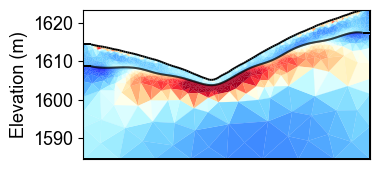

<Figure size 640x480 with 0 Axes>

In [6]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      result.final_models[:,i][result.mesh.cellMarkers()],
                      pad=0.3,
                      orientation="vertical",
                      cMap=fixed_cmap,
                      cMin=100,
                      cMax=3000,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i][result.mesh.cellMarkers()]>-1.2)
    if i ==0:
        ax.plot([40],[1607],'*',c='k')
        ax.plot([80],[1621],'*',c='k')

        ax.plot([30],[1604],'*',c='k')
        ax.plot([65],[1608],'*',c='k')
        
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()
plt.savefig("results/Structure_WC/timelapse_ert_with structure.tiff", dpi=300, bbox_inches='tight')

02/06/25 - 16:22:02 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1a9b021b4d0>)

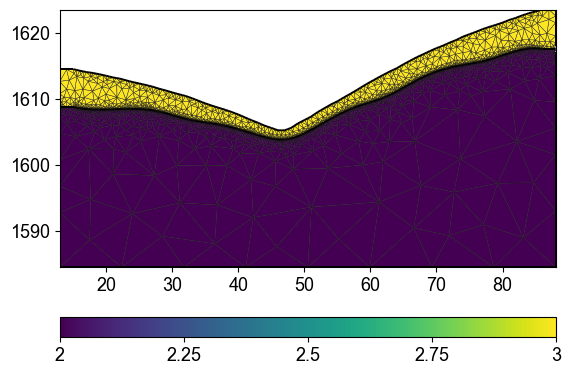

In [7]:
temp_marker = mesh_with_interface.cellMarkers()
index_marker = temp_marker[temp_marker != 1]
np.save("results/Structure_WC/index_marker.npy", index_marker)
pg.show(result.mesh,index_marker,cmap="viridis",clim=(0,1e4),showMesh=True)